<a href="https://colab.research.google.com/github/AldoEHF14/SciKitLearn-Machine-Learning/blob/main/Ajuste_Polinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ajuste Polinomial

## 📘 ¿Qué es el ajuste polinomial?

El ajuste polinomial es una técnica de regresión que permite modelar relaciones no lineales entre una variable independiente (entrada) y una variable dependiente (salida), utilizando un modelo polinomial.

En lugar de ajustar una línea recta como en la regresión lineal simple (y = a·x + b), se ajusta una curva del tipo:

    y=a0+a1x+a2x2+a3x3+⋯+anxn

Donde:

- x: variable independiente (por ejemplo, velocidad).
- y: variable dependiente (por ejemplo, distancia de frenado).
- 𝑎0,𝑎1,...,𝑎n: coeficientes del modelo.

<img src="https://static.wixstatic.com/media/cdf9fd_c5fe11c9ec4643579080470c2e8bf444~mv2.png/v1/fill/w_567,h_680,al_c,q_90,enc_avif,quality_auto/CRISP-DM.png"  width="550" height="400">


## 🎯 ¿Para qué se utiliza?
Se usa cuando los datos muestran una tendencia curva, es decir, no siguen una línea recta. Algunos ejemplos comunes:

* Ingeniería: velocidad vs distancia de frenado.

* Economía: tamaño de casa vs precio.

* Ciencia: temperatura vs rendimiento de una reacción.

* Negocios: inversión publicitaria vs ventas.

Ejemplo: Udaremos el siguiente Dataset para analizar cómo ha aumentado el precio de los boletos en EE.UU. a lo largo de los años. Con el objetivo de justar varios modelos polinomiales (grados 1 a 6) para ver cuál se ajusta mejor.

Video sobre Regresion Polinomial:
[Regresion Polinomial](https://www.youtube.com/watch?v=ftMDHK0Hc5A&t=108s)

PolynomialFeatures:
[sciki-learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

Selección de datos con los que trabajamos:
[Dataset](https://drive.google.com/file/d/1Xme-xKdDOrgTLv09mUP0Z5V5papAeYo3/view)



In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split # Dividir el conjunto
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt


In [9]:
#Leer archivo desde el escritorio (Google Colab)
from google.colab import files
uploaded = files.upload()

Saving boletos.csv to boletos (1).csv


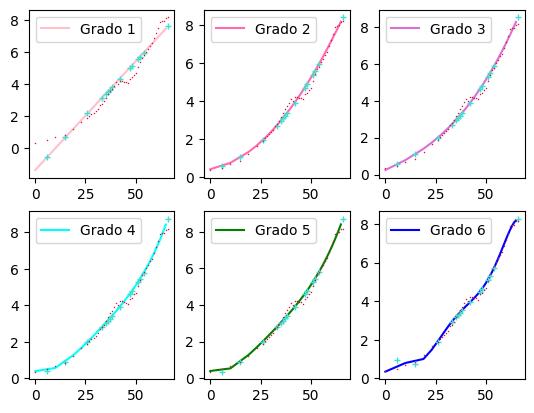

In [17]:
datos = pd.read_csv("boletos.csv")
df=pd.DataFrame(datos)

# Variable independiente
x = df["years"]
# Variable dependiente
y=df["boleto"]


xl = df["years"]
yl = df["boleto"]

# Entrenamiento y prueba
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

X_train = X_train.values.reshape([X_train.values.shape[0],1])
X_test = X_test.values.reshape([X_test.values.shape[0],1])

titles = ["Grado 0","Grado 1","Grado 2","Grado 3","Grado 4","Grado 5","Grado 6"]
colors = ["tesl","pink","hotpink","orchid","aqua","green","blue"]

# Probar todos los modelos de una sola vez
for i in range(1,7):
  poly_features = PolynomialFeatures(degree=i)
  X_poly = poly_features.fit_transform(X_train)
  Xt_poly = poly_features.fit_transform(X_test)
  # Crear el modelo lineal
  poly_model = LinearRegression()
  poly_model.fit(X_poly,y_train)
  # Prediccion
  pred = poly_model.predict(X_poly)
  pred2 = poly_model.predict(Xt_poly)
  # Ordenar los datos para que se pueda graficar
  xt,yt=zip(*sorted(zip(X_test,pred2)))
  X,y=zip(*sorted(zip(X_train,pred)))
  # plt.subplot(2,3,i)
  plt.subplot(2,3,i)
  plt.plot(X,y,"-",color=colors[i],label=titles[i],markersize=2)
  plt.plot(xt,yt,"+",color="turquoise",markersize=5)
  plt.plot(xl,yl,"*",color="crimson",markersize=0.5)
  plt.legend(loc=2)

